In [1]:
import sys
import re
import json

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

### 概要check

In [164]:
# df1 = pd.read_json('input/app_all_info_1.json')
# df2 = pd.read_json('input/app_all_info_2.json')
# df3 = pd.read_json('input/app_all_info_3.json')
# df4 = pd.read_json('input/app_all_info_4.json')
# df5 = pd.read_json('input/app_all_info_5.json')
# df6 = pd.read_json('input/app_all_info_6.json')
# df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)
# df

,id,letter,page,request_at,resultCount,results,sub_genre_id
0,965618039,A,1,2020-06-29 15:24:09,1,[{'screenshotUrls': ['https://is5-ssl.mzstatic...,7001
1,785492560,A,1,2020-06-29 15:24:09,1,"[{'isGameCenterEnabled': True, 'screenshotUrls...",7001
10,933128000,A,1,2020-06-29 15:24:09,1,"[{'isGameCenterEnabled': False, 'screenshotUrl...",7001
100,417152825,A,2,2020-06-29 15:24:16,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001
1000,910366938,A,10,2020-06-29 15:25:19,1,"[{'screenshotUrls': [], 'ipadScreenshotUrls': ...",7001
10000,424991374,D,9,2020-06-29 16:31:47,1,[{'artworkUrl100': 'https://is1-ssl.mzstatic.c...,7001
10001,406460485,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is1-ssl.mzstatic...,7001
10002,804721051,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is4-ssl.mzstatic...,7001
10003,976543106,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is5-ssl.mzstatic...,7001
10004,1483646457,D,9,2020-06-29 16:31:48,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001


In [165]:
# gotten_game_ids = list(df['id'].values)
# gotten_game_ids

[965618039,
 785492560,
 933128000,
 417152825,
 910366938,
 424991374,
 406460485,
 804721051,
 976543106,
 1483646457,
 1153703269,
 1227402613,
 964143484,
 1450757976,
 1010568226,
 1142321585,
 1330796266,
 1206452240,
 843268333,
 639867766,
 1414972076,
 1395034135,
 1146968859,
 1321436037,
 1408503683,
 960921917,
 1481959149,
 1132718917,
 1262746473,
 878988311,
 1453177824,
 1232234707,
 1232235137,
 1152176682,
 1410650161,
 903661452,
 1377657222,
 1450015565,
 1255006579,
 892192473,
 895602986,
 1417610559,
 1255790005,
 765319721,
 1450104076,
 837918885,
 806029694,
 912329713,
 1504985656,
 1441203740,
 607125378,
 607131452,
 607126572,
 607130758,
 1158399485,
 1196013243,
 1188967099,
 909639660,
 971192645,
 743872989,
 1513858630,
 448978584,
 1236434607,
 1236454487,
 1413862752,
 1030437165,
 1274417992,
 1120939568,
 1102856441,
 1110280145,
 547135385,
 1474213740,
 1448199207,
 1476142691,
 1203303474,
 1494131892,
 1201108812,
 1191595553,
 737292145,
 557

In [167]:
# df = df.drop_duplicates(subset='id').reset_index(drop=True)
# df

,id,letter,page,request_at,resultCount,results,sub_genre_id
0,965618039,A,1,2020-06-29 15:24:09,1,[{'screenshotUrls': ['https://is5-ssl.mzstatic...,7001
1,785492560,A,1,2020-06-29 15:24:09,1,"[{'isGameCenterEnabled': True, 'screenshotUrls...",7001
2,933128000,A,1,2020-06-29 15:24:09,1,"[{'isGameCenterEnabled': False, 'screenshotUrl...",7001
3,417152825,A,2,2020-06-29 15:24:16,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001
4,910366938,A,10,2020-06-29 15:25:19,1,"[{'screenshotUrls': [], 'ipadScreenshotUrls': ...",7001
5,424991374,D,9,2020-06-29 16:31:47,1,[{'artworkUrl100': 'https://is1-ssl.mzstatic.c...,7001
6,406460485,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is1-ssl.mzstatic...,7001
7,804721051,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is4-ssl.mzstatic...,7001
8,976543106,D,9,2020-06-29 16:31:47,1,[{'screenshotUrls': ['https://is5-ssl.mzstatic...,7001
9,1483646457,D,9,2020-06-29 16:31:48,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001


In [170]:
# df = df.sort_values(by=['sub_genre_id', 'letter', 'page']).reset_index(drop=True)

In [171]:
# df.to_json('input/app_all_info.json')

In [171]:
df = pd.read_json('input/app_all_info.json')

### やや詳細check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7a180a898>,
      dtype=object)

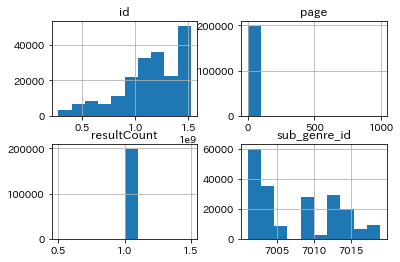

In [177]:
df.hist()

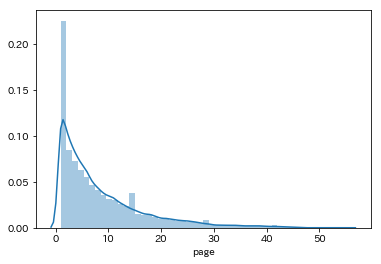

In [180]:
sns.distplot(df[df['page']<800]['page'])

In [187]:
df['page'].value_counts()

1      26845
2      21547
3      18170
4      15721
5      13529
6      11900
7       9942
8       8753
9       7564
10      6789
11      6417
12      5631
13      4984
14      4291
15      3767
16      3277
18      2980
17      2950
19      2469
21      2017
20      1984
22      1882
23      1673
24      1567
25      1466
26      1323
27      1190
28       917
29       870
30       584
31       568
34       566
33       561
32       554
35       452
38       436
39       427
37       423
36       400
41       297
40       294
42       286
43       239
44       154
45       133
46       103
51        26
47        20
53        19
54        18
50        18
48        11
55        10
52         8
49         8
991        4
Name: page, dtype: int64

In [190]:
df['letter'].value_counts()

S    23070
C    19527
B    15591
M    14541
P    12902
F    12182
T    11216
A    11101
D    10076
H     8064
R     7946
W     6928
G     6832
L     6416
E     5337
J     4227
K     4099
N     3635
I     3477
O     2647
V     2135
Z     1930
U     1908
Q     1134
#      891
Y      685
X      537
Name: letter, dtype: int64

In [184]:
df['resultCount'].unique()

array([1])

In [185]:
df['sub_genre_id'].value_counts()

7001    38530
7009    28159
7012    23400
7002    21420
7003    19369
7004    15882
7015    10527
7014     9293
7005     6596
7018     6277
7013     5646
7016     3987
7017     2850
7019     2803
7011     2510
7006     1785
Name: sub_genre_id, dtype: int64

### is画像URL抽出

In [191]:
def extract_is_image_url(results):
    return list(flatten([re.findall('https://is.*', str(s)) for s in flatten(results[0].values())]))

In [192]:
df['is_image_url'] = df['results'].map(extract_is_image_url)
df

,id,letter,page,request_at,resultCount,results,sub_genre_id,is_image_url
0,867982686,#,1,2020-06-29 21:28:26,1,"[{'appletvScreenshotUrls': [], 'screenshotUrls...",7001,[https://is4-ssl.mzstatic.com/image/thumb/Purp...
1,963021263,#,1,2020-06-29 21:28:26,1,[{'ipadScreenshotUrls': ['https://is5-ssl.mzst...,7001,[https://is5-ssl.mzstatic.com/image/thumb/Purp...
2,720208070,#,1,2020-06-29 21:28:26,1,"[{'isGameCenterEnabled': True, 'screenshotUrls...",7001,[https://is4-ssl.mzstatic.com/image/thumb/Purp...
3,522404327,#,1,2020-06-29 21:28:26,1,[{'ipadScreenshotUrls': ['https://is1-ssl.mzst...,7001,[https://is1-ssl.mzstatic.com/image/thumb/Purp...
4,1456065450,#,1,2020-06-29 21:28:27,1,[{'screenshotUrls': ['https://is2-ssl.mzstatic...,7001,[https://is2-ssl.mzstatic.com/image/thumb/Purp...
5,1482998673,#,1,2020-06-29 21:28:27,1,[{'screenshotUrls': ['https://is4-ssl.mzstatic...,7001,[https://is4-ssl.mzstatic.com/image/thumb/Purp...
6,1086251384,#,1,2020-06-29 21:28:27,1,[{'artistViewUrl': 'https://apps.apple.com/jp/...,7001,[https://is5-ssl.mzstatic.com/image/thumb/Purp...
7,1074595388,#,1,2020-06-29 21:28:27,1,"[{'isGameCenterEnabled': False, 'screenshotUrl...",7001,[https://is5-ssl.mzstatic.com/image/thumb/Purp...
8,743843492,#,1,2020-06-29 21:28:28,1,[{'screenshotUrls': ['https://is3-ssl.mzstatic...,7001,[https://is3-ssl.mzstatic.com/image/thumb/Purp...
9,1328952941,#,1,2020-06-29 21:28:28,1,[{'screenshotUrls': ['https://is4-ssl.mzstatic...,7001,[https://is4-ssl.mzstatic.com/image/thumb/Purp...


In [193]:
df.loc[0, 'is_image_url']

['https://is4-ssl.mzstatic.com/image/thumb/Purple127/v4/a4/3e/d4/a43ed4c3-4e31-9316-e1f3-c874e7f4a1d5/pr_source.png/392x696bb.png',
 'https://is3-ssl.mzstatic.com/image/thumb/Purple111/v4/ab/50/66/ab506616-0e78-bab9-8372-266ed419f8d0/pr_source.png/392x696bb.png',
 'https://is3-ssl.mzstatic.com/image/thumb/Purple117/v4/f9/a7/c5/f9a7c54d-1549-1bd2-eb88-6cace8bc29e4/pr_source.png/392x696bb.png',
 'https://is5-ssl.mzstatic.com/image/thumb/Purple117/v4/95/a4/6b/95a46bba-881a-fe10-9a47-77a7ce4ecf94/pr_source.png/392x696bb.png',
 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/60x60bb.jpg',
 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/512x512bb.jpg',
 'https://is1-ssl.mzstatic.com/image/thumb/Purple117/v4/0a/b4/1b/0ab41b6c-45fa-0a63-98d8-8c4dd07f7680/source/100x100bb.jpg']